# Exercise: Data Visualization
- Tampilkan visualisasi yang sesuai
- Berikan insightnya

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Sample - Superstore.xlsx', sheet_name='Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df['Sales'].sort_values()

4101        0.444
9292        0.556
8658        0.836
4711        0.852
2106        0.876
          ...    
4190    10499.970
2623    11199.968
8153    13999.960
6826    17499.950
2697    22638.480
Name: Sales, Length: 9994, dtype: float64

### **No.1**

Tampilkan distribusi Sales

<function matplotlib.pyplot.show(close=None, block=None)>

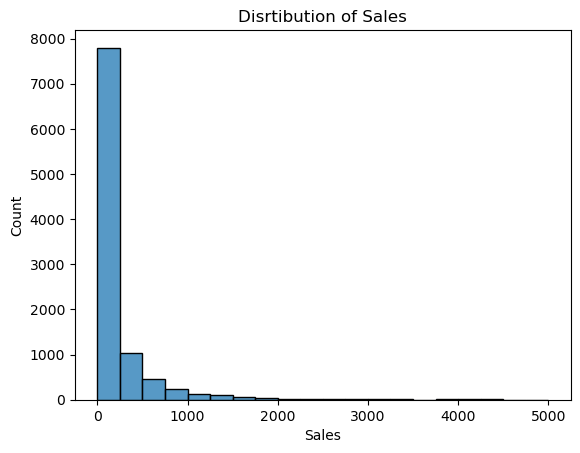

In [4]:
sns.histplot(data=df, x='Sales',binrange=(0,5000), bins=20) 

# binrange: batas kiri dan kanan dari histogram
# bins: jumlah batang pada rentang binrange
# binwith; lebar/ interval tiap batang


plt.title('Disrtibution of Sales')

plt.show

insight:
- penjualan terbanyak terjadi di rentan 0-250 

<function matplotlib.pyplot.show(close=None, block=None)>

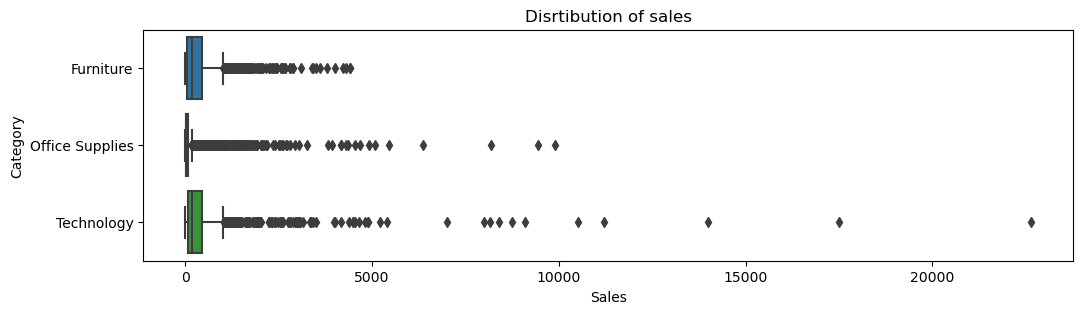

In [5]:
plt.figure(figsize=(12,3))  

sns.boxplot(data=df, x='Sales', y='Category')

plt.title('Disrtibution of sales')

plt.show

### **No.2**

Apakah ada outliers di variable Sales? Di nilai berapa nilai Sales dianggap outliers?

In [6]:
# scipy.stat. iqr

<function matplotlib.pyplot.show(close=None, block=None)>

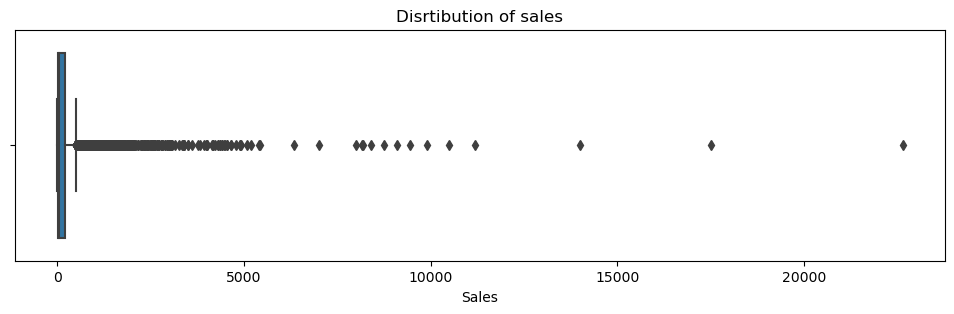

In [7]:
plt.figure(figsize=(12,3))  

sns.boxplot(data=df, x='Sales')

plt.title('Disrtibution of sales')

plt.show

In [8]:
IQR = (df['Sales'].quantile(0.75)) - (df['Sales'].quantile(0.25)) 
IQR

192.66

In [9]:
upper_bound = (df['Sales'].quantile(0.75)) + (1.5 * IQR) 
upper_bound

498.93

In [10]:
outliesrs = df[df['Sales'] > upper_bound]
outliesrs.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
7,8,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
10,11,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
11,12,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,4,0.20,68.3568


In [11]:
len(outliesrs)

1167

### **No.3**

Tampilkan total profit tiap Category

<AxesSubplot:xlabel='Category', ylabel='Profit'>

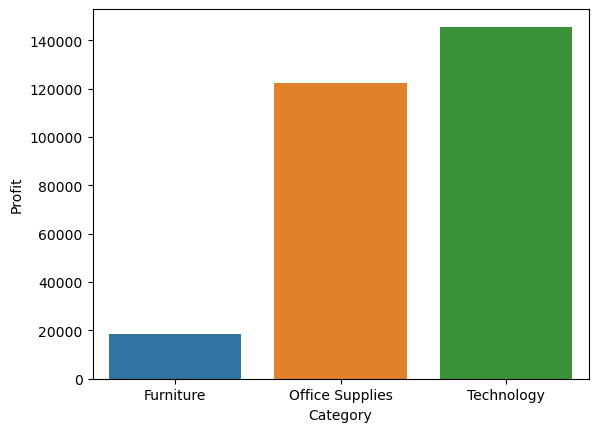

In [12]:
sns.barplot(data=df, x='Category', y='Profit', estimator=np.sum, ci=0 )

insght:
- penjulan tech teringgi
- penjualan office supplies catagory terendah

### **No.4**

Tampilkan total profit tiap Segment yang dibagi lagi per Category

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

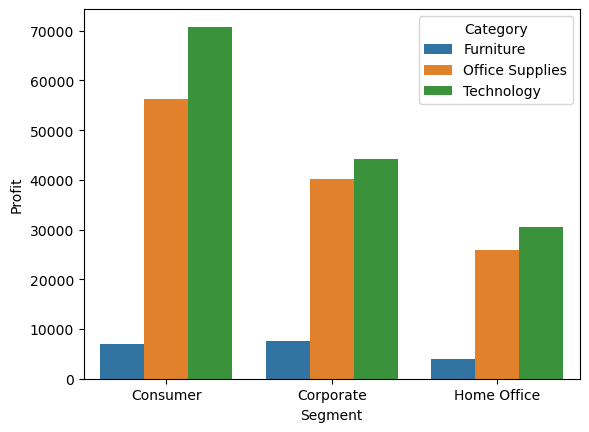

In [23]:
sns.barplot(data=df, x='Segment', y='Profit', hue= 'Category' ,estimator=np.sum, ci=0 )

insight:
- profit tertinggi di catagory tech berada di segment comsumer
- profit terendah di catagory funiture di segment home office

### **No.5**

Apakah ada hubungan antara Discount dan Profit? 

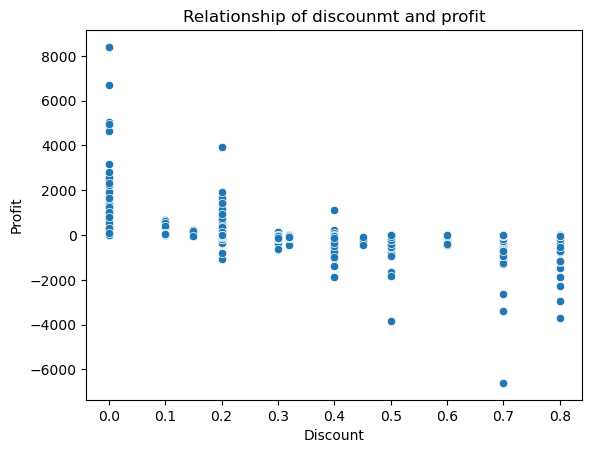

In [14]:
sns.scatterplot(
    data=df,
    x= 'Discount',   
    y= 'Profit'
)

plt.title('Relationship of discounmt and profit')

plt.show()

In [24]:
df['Discount'].corr(df['Profit'], method='spearman')

-0.543351161576118

insight:
- berkorelasi sedang negatif

### **No.6**

Tampilkan total profit tiap bulan dari 2016-2019

In [16]:
df['Order Date'].apply(lambda x: str(x)[0:7])

0       2018-11
1       2018-11
2       2018-06
3       2017-10
4       2017-10
         ...   
9989    2016-01
9990    2019-02
9991    2019-02
9992    2019-02
9993    2019-05
Name: Order Date, Length: 9994, dtype: object

In [17]:
df['Order Mounth'] = df['Order Date'].apply(lambda x: str(x)[:7])

df['Order Mounth'] = pd.to_datetime(df['Order Mounth'])

In [18]:
# buat table summary
df_group=df.groupby('Order Mounth').sum()[['Profit']].reset_index()
df_group.head()

,Order Mounth,Profit
0,2016-01-01,2450.1907
1,2016-02-01,862.3084
2,2016-03-01,498.7299
3,2016-04-01,3488.8352
4,2016-05-01,2738.7096


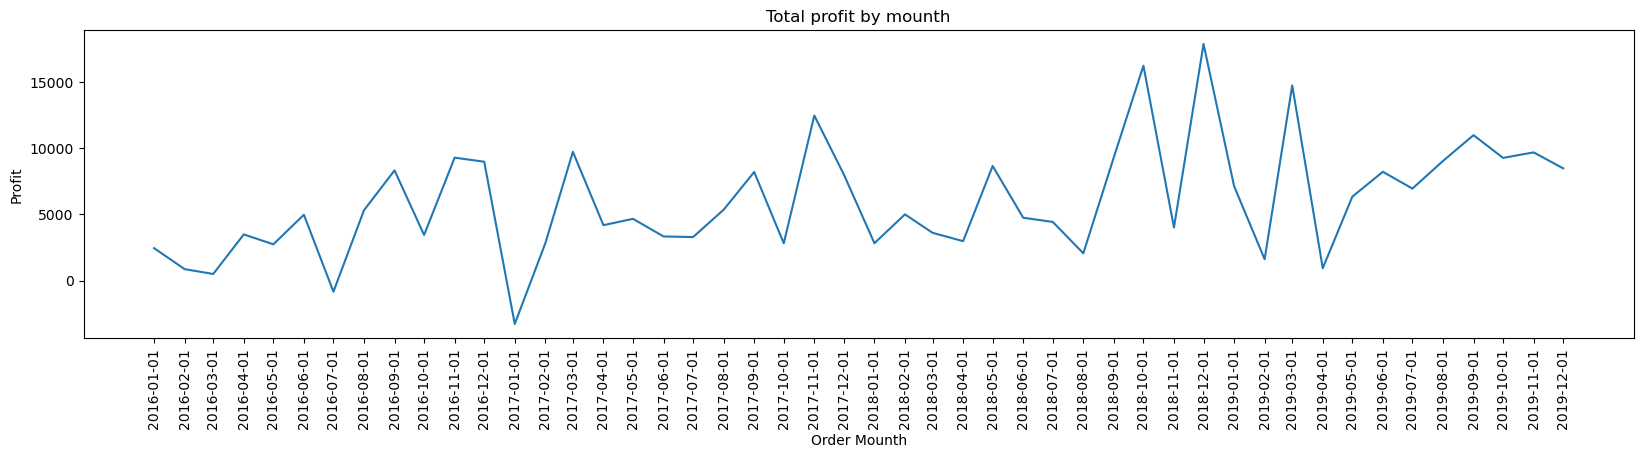

In [19]:
plt.figure(figsize=(20,4))  

sns.lineplot(
    data=df_group,
    x= 'Order Mounth',  
    y= 'Profit',
       
)

plt.xticks(ticks=df_group['Order Mounth'], rotation= 90)
plt.title('Total profit by mounth')

plt.show()

### **No.7**

Bandingkan trend profit pada tanggal 15 dan tanggal 28 dari tiap bulan

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [21]:
df['date bantuan'] = df['Order Date'].apply(lambda x: str(x)[8:10])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Mounth,date bantuan
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2018-11-01,08
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2018-11-01,08
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2018-06-01,12
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2017-10-01,11
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2017-10-01,11


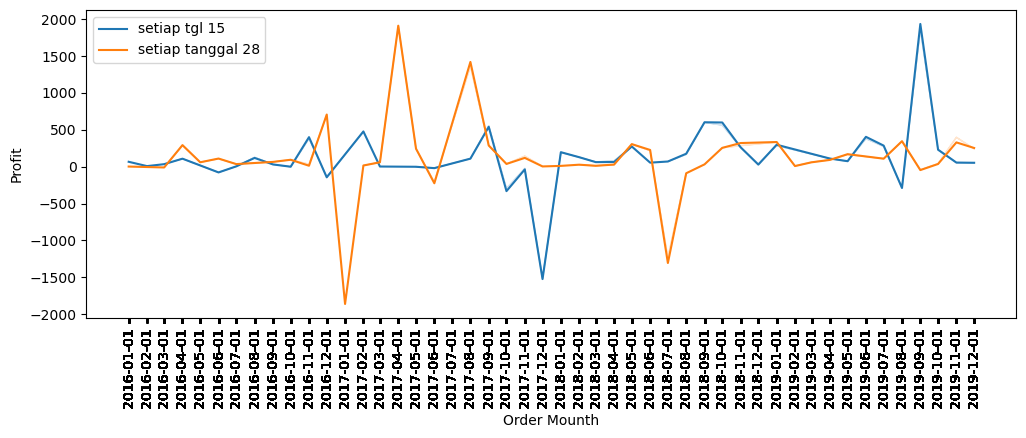

In [22]:

plt.figure(figsize=(12,4))  

sns.lineplot(
    data=df[df['date bantuan'] == '15'],
    x= 'Order Mounth',   
    y= 'Profit',
    estimator= np.sum,
    ci= 0,
    label= 'setiap tgl 15'
    
)

sns.lineplot(
    data=df[df['date bantuan'] == '28'],
    x= 'Order Mounth',   
    y= 'Profit',
    estimator= np.sum,
    ci= 0,
    label= 'setiap tanggal 28'
       
)

plt.xticks(ticks=df['Order Mounth'], rotation= 90)

plt.show()


insight:
- pd tgl 28 bulan 1 tahun 2017 mungkin cuci gudang dari stock tahun baru
- pd tgl 15 bulan 12 tahun 2017 mungkin over cashback

Bandingkan trend profit pada tanggal 15 dan tanggal 28 dari tiap bulan 

Here's a brief explanation of some common format codes used in the strftime() method:

- %Y: Year with century as a decimal number (e.g. 2022)
- %m: Month as a zero-padded decimal number (e.g. 04 for April)
- %B: Full month name (e.g. April)
- %b: Abbreviated month name (e.g. Apr)
- %d: Day of the month as a zero-padded decimal number (e.g. 07 for the 7th day of the month)
- %H: Hour (24-hour clock) as a zero-padded decimal number (e.g. 15 for 3pm)
- %M: Minute as a zero-padded decimal number (e.g. 30)
- %S: Second as a zero-padded decimal number (e.g. 00)
- %p: AM or PM designation for the 12-hour clock (e.g. PM)

In [25]:
df['Order Date'].dt.strftime('%Y %b')

0       2018 Nov
1       2018 Nov
2       2018 Jun
3       2017 Oct
4       2017 Oct
          ...   
9989    2016 Jan
9990    2019 Feb
9991    2019 Feb
9992    2019 Feb
9993    2019 May
Name: Order Date, Length: 9994, dtype: object